In [1]:
%display typeset

# Les multiplicateurs de Lagrange

##  Exemple: 
On considére la fonction $f(x,y)=(x-1)^2+(y-2)^2$. 
Parmi les points $(x,y)$ sur le cercle $x^2+y^2=45$, on cherche celui /ceux  où $f$ atteint son minimum/maximum.

In [7]:

var('x,y,u,v')
f(x,y)=(x-1)^2+(y-2)^2
r=sqrt(45)

In [19]:
cm = colormaps.Blues # There are several names predefined
def c(x,y):
	return float((f(x,y))/170)
S=plot3d(f(u,v),(u,-r-1,r+1),(v,-r-1,r+1), color=(c,cm))
C = parametric_plot3d([r*cos(v),r*sin(v),0],(v,0,2*pi), color='red', thickness=2)
CS =parametric_plot3d([r*cos(v),r*sin(v),f(r*cos(v), r*sin(v))],(v,0,2*pi), color='green', thickness=3)
show(S+C+CS, aspect_ratio=[5,5,1]);

Graphics3d Object

In [18]:
df=f.gradient()

Voyons le probème en termes de courbes de niveau et du champ gradient de $f$. Rappelons que $\nabla f(x_0,y_0)$ donne la direction dans laquelle il faut se déplacer à partir de $(x_0,y_0)$ pour avoir la plus forte augmentation dans la valeur de $f$.

Ci bas, on trouve les courbes de niveau de $f$, ainsi que le champ $\nabla f$ et la courbe $x^2 + y^2 = 45$ (en rouge).

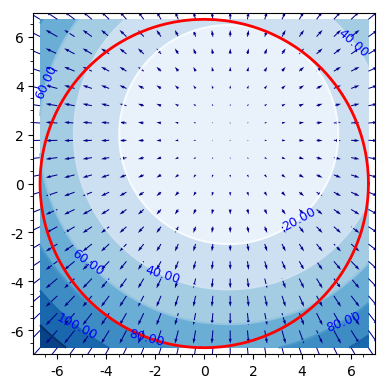

In [21]:
Champf=plot_vector_field(df, (x,-r,r), (y,-r,r), color='darkblue',aspect_ratio=1)
Contourf=contour_plot(f(u,v),(u,-r,r),(v,-r,r),cmap='Blues',labels=True, linestyles='solid',aspect_ratio=1);
Cercle = parametric_plot([r*cos(u),r*sin(u)],(u,0,2*pi), color='red', thickness=2,aspect_ratio=1)
show(Contourf+Cercle+Champf);

La courbe de contrainte est donnée par par $g(x,y)=45$ ou $(x,y) = x^2 + y^2$ est la fonction de contrainte. C'est donc une courbe de niveau pour la fonction de contrainte $g$. Cette fonction a aussi un champ gradient, $\nabla g$. Dessinons les vecteurs de ce champ, mais seulement ceux qui correspondent aux points sur la courbe.

In [25]:
Pts=[(r*cos(2*t*pi/20),r*sin(2*t*pi/20)) for t in range(20)];
Pts1=[(1.1*r*cos(2*t*pi/20),1.1*r*sin(2*t*pi/20)) for t in range(20)];
Vecs=[arrow(Pts[j],Pts1[j],color='red', width=1,  arrowsize = 2) for j in range(20)];
Champg=sum(Vecs)

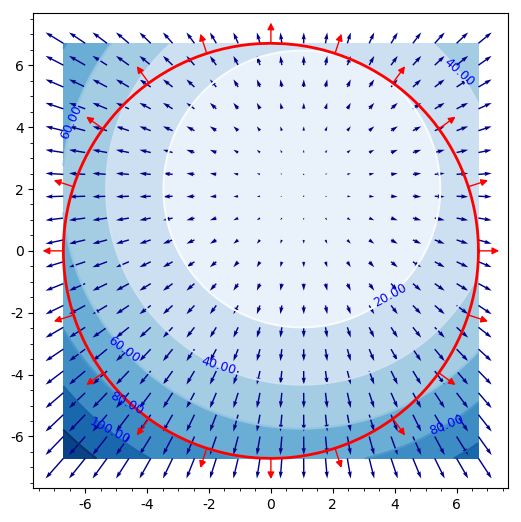

In [26]:
show(Contourf+Cercle+Champf+Champg,aspect_ratio=1, figsize = 8);

**Conjecture:** Les points de maximum / minimum de $f$ sur la courbe $g=45$ sont précisément ceux pour lequels les vecteurs gradient $\nabla f$ et $\nabla g$ sont colinéaires. En d'autres termes, il doit exister $\lambda\in \mathbb{R}$ tel que  $$\nabla f = \lambda \nabla g$$

Demandons à SAGE de résoudre les équations qu'on a besoin de résoudre. La fonction $f$ a déjà été définie,mais pas $g$, et nous avons également d'une nouvelle variable $L$ qui jouera le rôle de $\lambda$.

In [27]:
g(x,y)=x^2+y^2
dg=g.gradient()
var('L')
df(x,y)
dg(x,y)

(2*x, 2*y)

In [28]:
solve([df[0](x,y)==L*dg[0](x,y), df[1](x,y)==L*dg[1](x,y), g(x,y)==45],[x,y,L])

[[x == -3, y == -6, L == (4/3)], [x == 3, y == 6, L == (2/3)]]

Ici `df` est le gradient de $f$, c'est donc une fonction de deux variables, à valeurs dans $\mathbb{R}^2$, c'est à dire une paire de fonctions. Ainsi, `df[0]` est la première de ces deux fonctions (on commence à compter à $0$, c'est à dire $f_x$ ou encore $\frac{\partial f}{\partial x}$), et donc `df[0](x,y)` est la fonction évaluée en $(x,y)$.